# Análisis de Regresión

---------------
## Tabla de contenido
---------------

* Definición
* Regresión Lineal Simple
* Uso de libreria Scikit learn
* Métricas
* Métodos de regresión

---------------
## Definición
---------------

El análisis de regresión es una técnica estadística utilizada para investigar la relación entre una variable dependiente (o respuesta) y una o más variables independientes (o predictores).

Se utiliza comúnmente para predecir el valor de la variable dependiente cuando se conocen los valores de las variables independientes. El objetivo principal es modelar la relación subyacente y comprender la fuerza y dirección de la asociación.

---------------
## Regresión Lineal Simple
---------------

En la regresión lineal simple, se considera una variable dependiente (Y) en relación con una única variable independiente (X). El modelo lineal simple se expresa mediante la ecuación:

$ Y =\beta_0+\beta_1X+\epsilon$

Donde:

* Y es la variable dependiente.
* X es la variable independiente.
* $\beta_0$ es la ordenada al origen (intercepto).
* $\beta_1$ es la pendiente de la recta de regresión.
* $\epsilon$ es el término de error, que representa la variabilidad no explicada.

In [19]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt # graficos, viz, plots

In [20]:
# Paso 1: Definir los datos
X = np.array([1, 2, 3, 4, 5])
Y = np.array([60, 75, 82, 93, 100])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


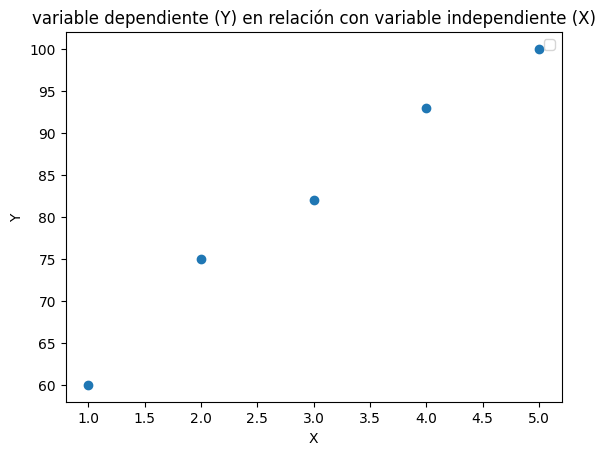

In [21]:
# Visualización de los resultados
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('variable dependiente (Y) en relación con variable independiente (X)')
plt.legend()
plt.show()

### Estimación de Parámetros

La estimación de los parámetros  $\beta_0$ y $\beta_1$ se realiza a través de métodos como el método de mínimos cuadrados, que busca minimizar la suma de los cuadrados de las diferencias entre las observaciones reales y las predicciones del modelo.

La fórmula para la pendiente es: $\beta_1 = \frac{cov(X,Y)}{var(X)}$  

La fórmula para el intercepto (ordenada al origen) es : $ \beta_0 = Y - \beta_1\bar{X}$

Donde:

* $\bar{X}$ es la media de X.
* $\bar{Y}$ es la media de Y.
* $cov(X,Y)$ es la covarianza entre X e Y.
* $var(X)$ es la varianza X.

In [22]:
# Paso 2: Calcular la media de X e Y
mean_X = np.mean(X)
print(f"el promedio de X es : {mean_X}")
mean_Y = np.mean(Y)
print(f"el promedio de Y es : {mean_Y}")

el promedio de X es : 3.0
el promedio de Y es : 82.0


In [23]:
# Paso 3: Calcular la covarianza y la varianza
cov_XY = np.sum((X - mean_X) * (Y - mean_Y)) / len(X)
print(f"la covarianza entre X e Y es : {cov_XY}")
var_X = np.var(X)
print(f"la varianza de X es : {var_X}")

la covarianza entre X e Y es : 19.6
la varianza de X es : 2.0


In [24]:
# Paso 4: beta_1 - Calcular la pendiente
beta_1 = cov_XY / var_X
print(f"la pendiente es : {beta_1}")

la pendiente es : 9.8


In [25]:
# Paso 5: beta_0 - Calcular el intercepto (la ordenada al origen)
beta_0 = mean_Y - beta_1 * mean_X
print(f"el intercepto es : {beta_0}")

el intercepto es : 52.599999999999994


### Predicciones

Una vez que se han estimado los parámetros, se pueden hacer predicciones para nuevos valores de X utilizando la ecuación de regresión lineal simple:

$ \hat{Y} =\hat{\beta_0}+\hat{\beta_1}X$

Donde:


* $\hat{Y}$ es la predicción de Y para un valor dado de X.
* $\hat{\beta_0}$ y $\hat{\beta_1}$ son las estimaciones de los parámetros.

In [26]:
# Paso 6: Hacer predicciones para los valores de X
predictions = beta_0 + beta_1 * X

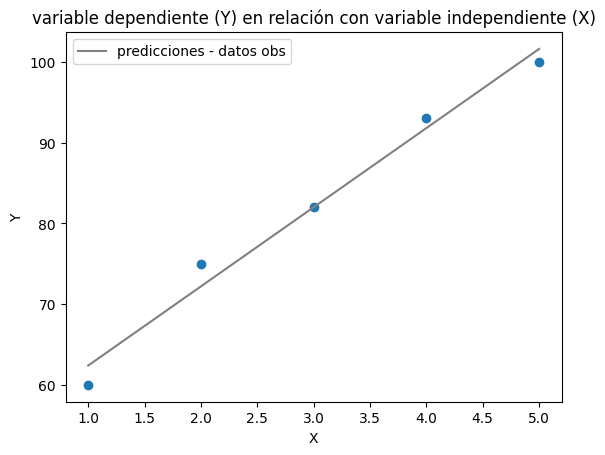

In [27]:
# Visualización de los resultados
plt.scatter(X, Y)
plt.plot(X, predictions, label='predicciones - datos obs', color='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('variable dependiente (Y) en relación con variable independiente (X)')
plt.legend()
plt.show()

In [28]:
# Paso 7: Hacer predicciones para nuevos valores de X
new_X = np.array([6, 7, 8, 9])

predictions_new_X = beta_0 + beta_1 * new_X

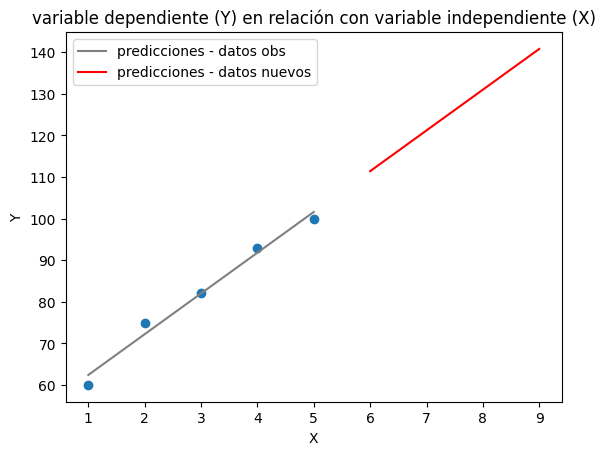

In [29]:
# Visualización de los resultados
plt.scatter(X, Y)
plt.plot(X, predictions, label='predicciones - datos obs', color='gray')
plt.plot(new_X, predictions_new_X, label='predicciones - datos nuevos', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('variable dependiente (Y) en relación con variable independiente (X)')
plt.legend()
plt.show()

### Evaluación del Modelo

La calidad del modelo se evalúa mediante estadísticas como el coeficiente de determinación ($R^2$), que indica la proporción de la variabilidad de la variable dependiente explicada por el modelo.

*IMPORTANTE* : Un $R^2$ cercano a 1 indica un buen ajuste del modelo a los datos

* 1er método de estimación del $R^2$ en términos de la suma de cuadrados de regresión (SSR) y la suma total de cuadrados (SST)

$R^2 =  \frac{SSR}{SST}=  \frac{\text{suma de los cuadrados de la regresión}}{\text{suma total de los cuadrados}}$  

Donde:

* $SSR = \sum_{i=1}^{n}{(\hat{Y}_i - \bar{Y})^2 }$
* $SST = \sum_{i=1}^{n}{({Y}_i - \bar{Y})^2 }$

In [30]:
# Paso 8: Calcular la suma de los cuadrados de la regresión (SSR)
SSR = np.sum((predictions - mean_Y) ** 2)
print(f"la suma de los cuadrados de la regresión (SSR) es : {SSR}")

la suma de los cuadrados de la regresión (SSR) es : 960.4000000000003


In [31]:
# Paso 9: Calcular la suma total de los cuadrados (SST)
SST = np.sum((Y - mean_Y) ** 2)
print(f"la suma total de los cuadrados (SST) es : {SST}")

la suma total de los cuadrados (SST) es : 978.0


In [32]:
# REVISAR 
# Paso 10: Calcular el coeficiente de determinación (R^2)
R_squared = (SSR / SST)
print(f"el coeficiente de determinación es : {R_squared}")

el coeficiente de determinación es : 0.9820040899795505


* 2do método de estimación del $R^2$ en términos de la suma de cuadrados de regresión (SSR) y la suma de cuadrados residuales (SSE)

$R^2 = 1 - \frac{SSE}{SST}= 1 - \frac{\text{suma de los cuadrados residuales}}{\text{suma total de los cuadrados}}$  

Donde:

* $SSE = \sum_{i=1}^{n}{({Y}_i - \hat{Y}_i )^2 }$
* $SST = \sum_{i=1}^{n}{({Y}_i - \bar{Y})^2 }$

In [33]:
# Paso 8: Calcular la suma de los cuadrados residuales (SSE)
SSE = np.sum((Y - predictions) ** 2)
print(f"la suma de los cuadrados residuales (SSE) es : {SSR}")

la suma de los cuadrados residuales (SSE) es : 960.4000000000003


In [34]:
# Paso 9: Calcular la suma total de los cuadrados (SST)
SST = np.sum((Y - mean_Y) ** 2)
print(f"la suma total de los cuadrados (SST) es : {SST}")

la suma total de los cuadrados (SST) es : 978.0


In [35]:
# REVISAR 
# Paso 10: Calcular el coeficiente de determinación (R^2)
R_squared = 1 - (SSE / SST)
print(f"el coeficiente de determinación es : {R_squared}")

el coeficiente de determinación es : 0.9820040899795501


---------------
## Uso de libreria Scikit learn
---------------

* solo importar las funciones necesarias
    * De "el modulo" importar "la funcion"

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [37]:

# Datos de ejemplo
# Supongamos que tenemos datos de horas de estudio (X) y calificaciones (y)
horas_estudio = np.array([1, 2, 3, 4, 5])
calificaciones = np.array([60, 75, 82, 93, 100])

# Reshape para convertir los arrays en matrices unidimensionales
X = horas_estudio.reshape(-1, 1)
y = calificaciones


In [38]:
# Crear un modelo de regresión lineal
modelo = LinearRegression()

In [39]:
# Entrenar el modelo con los datos # fit significa ajuste a los datos
modelo.fit(X, y)

LinearRegression()

In [40]:
# Hacer predicciones
predicciones_obs = modelo.predict(X)

In [41]:
# Hacer predicciones
horas_estudio_nuevas = np.array([6, 7, 8,9]).reshape(-1, 1)
predicciones_nuevos = modelo.predict(horas_estudio_nuevas)


In [42]:

# Coeficientes de la regresión
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_


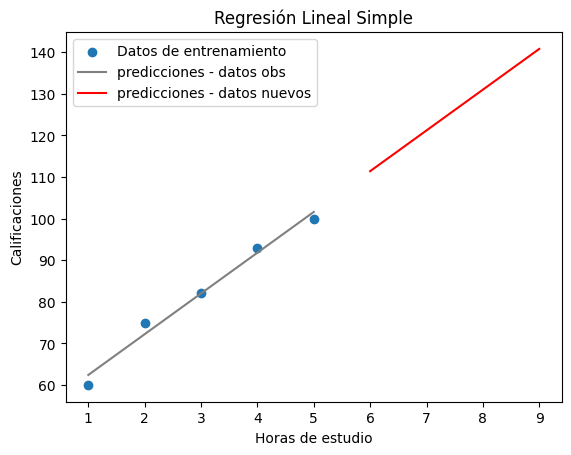

In [43]:

# Visualización de los resultados
plt.scatter(horas_estudio, calificaciones, label='Datos de entrenamiento')
plt.plot(horas_estudio, predicciones_obs, label='predicciones - datos obs', color='gray')
plt.plot(horas_estudio_nuevas, predicciones_nuevos, label='predicciones - datos nuevos', color='red')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificaciones')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


In [44]:

# Mostrar los resultados
print(f"Pendiente : {pendiente}")
print(f"Intercepto: {intercepto}")

Pendiente : 9.799999999999999
Intercepto: 52.6


In [45]:
# r cuadrado :  utiliza las y observadas y las y predicciones
R_cuadrado = r2_score(Y,predicciones_obs)
print('El poder explicativo del modelo de regresión es : {} %'.format(np.round(R_cuadrado*100,2)))

El poder explicativo del modelo de regresión es : 98.2 %


---------------
## Métricas
---------------

### Coeficiente de Determinación $R^2$

    * Mide la proporción de la variabilidad total de la respuesta que es explicada por el modelo. 
    * Es una medida de ajuste global del modelo. 
    * Es fácil de interpretar ya que un modelo con Coeficiente de Determinación que está más cerca de cero es peor que uno que más cerca que de uno 
    

$R^2 = 1 - \frac{SSE}{SST}= 1 - \frac{\text{suma de los cuadrados residuales}}{\text{suma total de los cuadrados}}$  

Donde:

* $SSE = \sum_{i=1}^{n}{({Y}_i - \hat{Y}_i )^2 }$
* $SST = \sum_{i=1}^{n}{({Y}_i - \bar{Y})^2 }$

    EJEMPLO

In [46]:
# 1- importar la funcion
from sklearn.metrics import r2_score
# 2 - aplicar la función con las Y observadas y las predicciones
R_cuadrado = r2_score(Y,predictions)
# 3 -mostrar el resultado de la evaluación
print('El performance es : {} %'.format(np.round(R_cuadrado*100,2)))

El performance es : 98.2 %


### Mean Squared Error

    * Proporciona la media de los cuadrados de los errores, es decir, la diferencia cuadrática media entre los valores estimados y los reales. 
    * Pone más peso en errores grandes debido al cuadrado. 
    * Es útil cuando grandes desviaciones son particularmente indeseables

$MSE = \frac{1}{n} \sum_{i=1}^{n}{({y}_i - \hat{y}_i )^2}$  

Donde:

* donde ${y}_i$ es el valor real, $\hat{y}_i$ es el valor predicho por el modelo y n es el número de observaciones.

    EJEMPLO

In [47]:
# 1- importar la funcion
from sklearn.metrics import mean_squared_error
# 2 - aplicar la función con las Y observadas y las predicciones
mse = mean_squared_error(Y,predictions)
# 3 -mostrar el resultado de la evaluación
print('Mean Squared Error (MSE) : {}'.format(mse))

Mean Squared Error (MSE) : 3.5200000000000022


### Root Mean Squared Error 

    * Es la raíz cuadrada del MSE, por lo que está en las mismas unidades que la variable de respuesta. Esto facilita la interpretación de la magnitud del error.
    * Al igual que el MSE, da más peso a los errores más grandes, pero al estar en la misma escala que la variable de respuesta, los resultados son más interpretables.

$RMSE =  \sqrt{\frac{1}{n} \sum_{i=1}^{n}{({y}_i - \hat{y}_i )^2} } $  

Es la raíz cuadrada del MSE

    EJEMPLO

In [48]:
# 1- importar la funcion
from sklearn.metrics import mean_squared_error
# 2 - aplicar la función con las Y observadas y las predicciones
rmse = np.sqrt(mean_squared_error(Y,predictions))
# 3 -mostrar el resultado de la evaluación
print('Root Mean Squared Error (RMSE): {}'.format(rmse))

Root Mean Squared Error (RMSE): 1.8761663039293723


### Mean Absolute Error

    * Calcula el promedio de los errores absolutos, lo que refleja la distancia promedio entre los valores predichos y los observados sin considerar la dirección (sin penalizar los errores en función de su dirección).
    * El MAE es una medida robusta frente a los valores atípicos

$MAE =  \frac{1}{n} \sum_{i=1}^{n}{|{y}_i - \hat{y}_i|}$  

    EJEMPLO

In [49]:
# 1- importar la funcion
from sklearn.metrics import mean_absolute_error
# 2 - aplicar la función con las Y observadas y las predicciones
mae = mean_absolute_error(Y,predictions)
# 3 -mostrar el resultado de la evaluación
print('Mean Absolute Error (MAE) : {}'.format(mae))

Mean Absolute Error (MAE) : 1.6


### Mean Absolute Percentage Error

    * El MAPE proporciona una idea de la precisión del modelo en términos de porcentaje, lo que permite una interpretación directa del tamaño del error en relación con los valores verdaderos.
    *Al expresar el error como un porcentaje, el MAPE normaliza los errores, lo que permite comparar la precisión entre series de datos o modelos con diferentes escalas

$MAPE =  (\frac{1}{n} \sum_{i=1}^{n}{|\frac{{y}_i - \hat{y}_i}{{y}_i} |}) \times 100$  

    EJEMPLO

In [50]:
# 1- importar la funcion
from sklearn.metrics import mean_absolute_percentage_error
# 2 - aplicar la función con las Y observadas y las predicciones
mape = mean_absolute_percentage_error(Y,predictions)
# 3 -mostrar el resultado de la evaluación
print('Mean Absolute Percentage Error (MAPE) : {}'.format(mape))

Mean Absolute Percentage Error (MAPE) : 0.021247311827956986


---------------
## Métodos de regresión
---------------

In [51]:
from sklearn.datasets import load_diabetes

In [52]:
# Cargar el conjunto de datos diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [83]:
display(diabetes.data)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [53]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regresión Lineal Múltiple

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
# 1. Regresión Lineal Múltiple
linear_model = LinearRegression() # inicio/ definir modelo
linear_model.fit(X_train, y_train) # enel aprendizaje se ajusta a los datos de entrenamiento
y_pred = linear_model.predict(X_test) # la evaluacion del rendimiento del modelo se haco sobre los datos de prueba


In [58]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("Regresión Lineal Múltiple:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

Regresión Lineal Múltiple:
MSE: 2900.19362849348
RMSE: 53.853445836765914
MAE: 42.79409467959994
MAPE: 0.3749982636756112


### Regresión Polinómica

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [60]:
# 2. Regresión Polinómica
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred = poly_model.predict(X_test_poly)

In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("Regresión Polinómica:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

Regresión Polinómica:
MSE: 3096.028307344272
RMSE: 55.641965344012355
MAE: 43.581693254652535
MAPE: 0.38285678514001414


### Árbol de Decisión

* Los árboles de decisión para regresión son modelos interpretables porque las decisiones tomadas por el modelo tienen una estructura lógica y cada nodo utiliza una condición basada en una sola característica que es fácil de entender. 
* Además, no asumen ninguna distribución específica de los datos, lo que los hace muy flexibles. 
* Sin embargo, pueden ser propensos al sobreajuste, especialmente si se les permite crecer demasiado complejos sin restricciones.

    * Inicio del Árbol: Se comienza con todos los datos en un único nodo, conocido como el nodo raíz.

    * División del Nodo (Splitting): Se selecciona la mejor variable y el punto de corte (split point) dentro de esa variable para dividir los datos en dos grupos. El objetivo es reducir la variabilidad de los valores de la variable objetivo dentro de cada grupo. Para la regresión, la variabilidad suele medirse con el MSE (Mean Squared Error) o la varianza; el objetivo es minimizar esta métrica al realizar cada división.

    * Creación de Nodos Hijos: Una vez que se ha hecho una división, se crean dos nuevos nodos, cada uno con un subconjunto de los datos basado en la división. Este proceso se repite de manera recursiva.

    * Condición de Parada: El árbol sigue creciendo hasta que se alcanza una condición de parada, que puede ser un número máximo de niveles, un número mínimo de muestras en un nodo, o una disminución mínima en la métrica de variabilidad.

    * Predicción: Una vez que se ha construido el árbol, se puede usar para hacer predicciones. Para predecir el valor de una nueva muestra, se sigue el árbol desde el nodo raíz, pasando por las divisiones según las características de la muestra hasta llegar a un nodo hoja. El valor predicho es el valor medio de la variable objetivo de las muestras de entrenamiento en ese nodo hoja.

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
# 3. Árbol de Decisión
tree_model = DecisionTreeRegressor(
    max_depth=3, # profundidad máxima del árbol, mayor profundidad puede capturar relaciones más complejas pero también puede llevar al sobreajuste
    min_samples_split=2, # Especifica el número mínimo de muestras requeridas para dividir un nodo interno. Si el número de muestras en un nodo es menor que min_samples_split el nodo no se dividirá y se considerará una hoja
    min_samples_leaf=1 # Especifica el número mínimo de muestras requeridas para ser una hoja. Si la división de un nodo resulta en una hoja con un número de muestras menor que min_samples_leaf esa división no se realizará
    )

In [64]:
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [65]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("Árbol de Decisión:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

Árbol de Decisión:
MSE: 3552.701313323753
RMSE: 59.60454104616319
MAE: 48.0965923002249
MAPE: 0.43069129555885505


#### grafico del arbol

In [66]:
from sklearn.tree import plot_tree

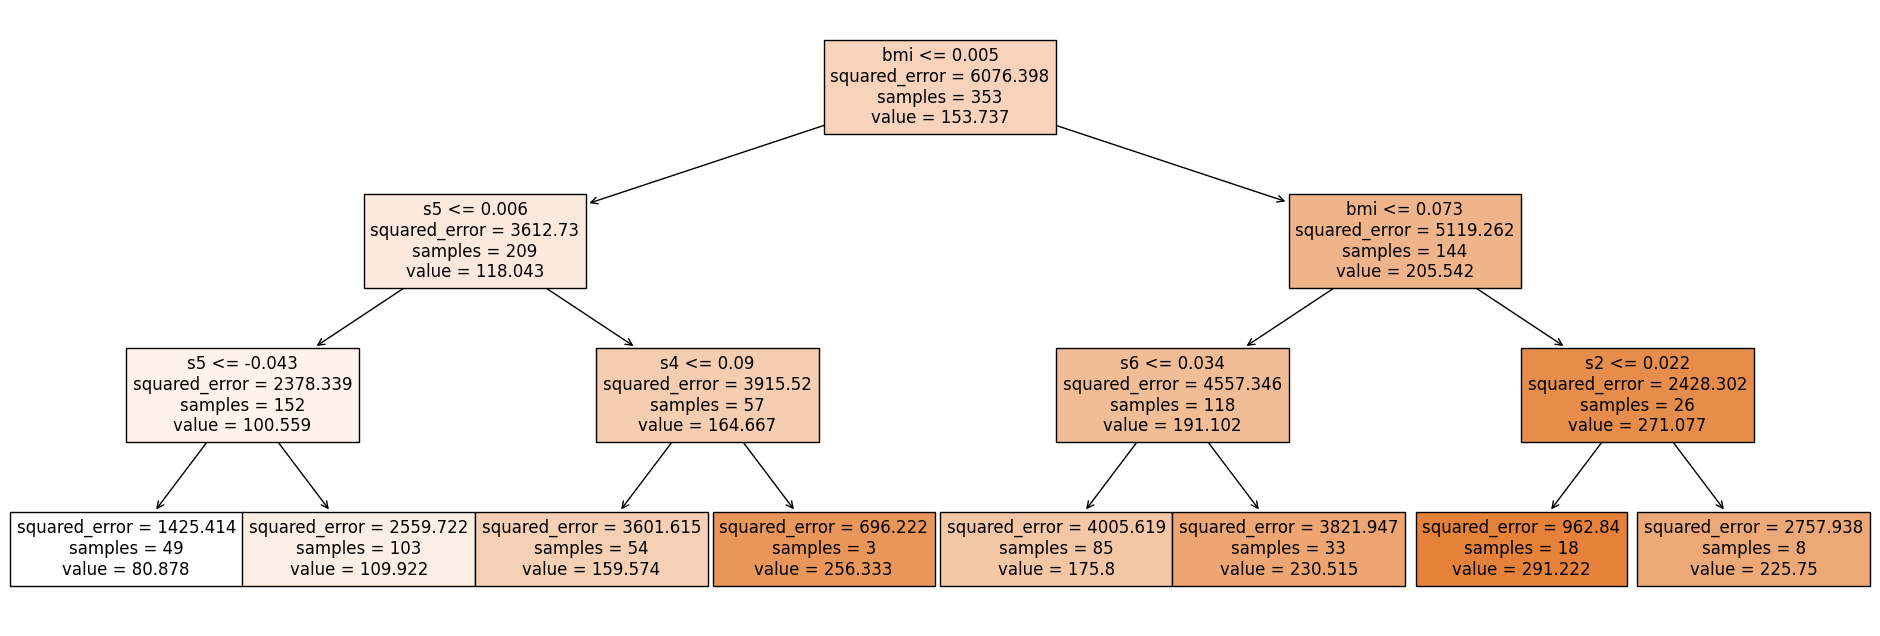

In [67]:
# Graficar el árbol
plt.figure(figsize=(24, 8))
plot_tree(tree_model, feature_names=diabetes.feature_names, filled=True)
plt.show()

### Random Forest

    * El Random Forest es un algoritmo robusto y fácil de usar que proporciona buenos resultados en una variedad de conjuntos de datos. Es resistente al sobreajuste y no requiere mucho ajuste de hiperparámetros. 
    * Además, es eficiente en términos de tiempo de entrenamiento y es fácilmente paralelizable, lo que lo hace adecuado para conjuntos de datos grandes. 
    * Debido a sus propiedades, el Random Forest es uno de los algoritmos de aprendizaje automático más populares y ampliamente utilizados.

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
# 4. Random Forest
forest_model = RandomForestRegressor(
    n_estimators=100, # Especifica el número de árboles en el bosque.
    max_depth=10, # profundidad máxima de cada árbol en el bosque.
    min_samples_split=20,  # número mínimo de muestras requeridas para dividir un nodo interno en cada árbol
    min_samples_leaf=1 # número mínimo de muestras requeridas para ser una hoja en cada árbol
)

In [70]:
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("Random Forest:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

Random Forest:
MSE: 2849.6165815751406
RMSE: 53.38180009680397
MAE: 43.11440655911265
MAPE: 0.38556297675046247


### Support Vector Machine (SVM)

    * SVM es efectivo en espacios de características de alta dimensión y es capaz de manejar datos no lineales utilizando trucos del kernel, que mapean los datos a un espacio de características de mayor dimensión donde las clases son linealmente separables. 
    * SVM es un algoritmo poderoso y versátil que se utiliza en una variedad de aplicaciones, incluidas la clasificación de texto, la detección de imágenes, la clasificación de biosecuencias y más.
    * La tarea de SVM es resolver un problema de optimización convexa. Para la clasificación, esto implica encontrar los pesos y sesgos del hiperplano que maximizan el margen mientras minimizan la clasificación errónea. Para la regresión, se busca encontrar la función que minimiza el error entre las predicciones y los valores reales, manteniendo los errores dentro de un margen especificado.
    * Una vez que se encuentra el hiperplano óptimo, SVM utiliza una función de decisión para clasificar nuevos puntos de datos o hacer predicciones en el caso de la regresión. Para la clasificación, la función de decisión asigna un nuevo punto a una de las dos clases en función de su posición con respecto al hiperplano. Para la regresión, la función de decisión estima el valor de la variable objetivo para un nuevo punto de datos.

In [72]:
from sklearn.svm import SVR

In [73]:
# 5. Support Vector Machine (SVM)
svm_model = SVR(
    # El kernel determina cómo se mapean los datos de entrada en un espacio de mayor dimensión donde sea más fácil realizar la separación
    kernel='linear', # Los kernels comunes son "linear" (lineal), "poly" (polinómico), "rbf" (función de base radial) y "sigmoid" (sigmoidal)
    # Parámetro de regularización que controla la penalización por errores de entrenamiento
    C=0.80, # Un valor más bajo de C permitirá un margen más amplio y permitirá que se clasifiquen más puntos correctamente, pero puede llevar al sobreajuste
    # tolerancia de la función de pérdida insensible en SVR. margen de insensibilidad a errores
    epsilon=0.05 #  lo que significa que cualquier error menor que epsilon se ignora y no contribuye a la función de pérdida
)

In [74]:

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("Support Vector Machine (SVM):")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

Support Vector Machine (SVM):
MSE: 5214.9701339128205
RMSE: 72.21475011320624
MAE: 62.05496515721647
MAPE: 0.5626339650807379


### K Nearest Neighbors (KNN)

    * El algoritmo encuentra los k puntos de datos más cercanos en el conjunto de entrenamiento al punto de consulta. La cercanía se mide generalmente utilizando una métrica de distancia, como la distancia euclidiana o la distancia de Manhattan
    * KNN es un algoritmo simple y fácil de entender, pero puede ser computacionalmente costoso en conjuntos de datos grandes, ya que requiere calcular la distancia entre el punto de consulta y todos los puntos en el conjunto de entrenamiento.
    

In [76]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
# 6. K Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(
    # Especifica el número k de vecinos que se utilizarán para hacer predicciones
    n_neighbors=5, # Un valor más alto de n_neighbors resultará en predicciones más suaves y menos sensibles al ruido, pero también puede reducir la capacidad del modelo para capturar patrones complejos en los datos
    #  Determina cómo se ponderan las contribuciones de los vecinos
    weights='distance',  # Puede ser "uniforme", donde todos los vecinos tienen el mismo peso en la predicción, o "distance", donde el peso de cada vecino es inversamente proporcional a su distancia desde el punto de consulta
    # Especifica el algoritmo utilizado para calcular los vecinos más cercanos.
    algorithm='auto' # Puede ser "auto", "ball_tree", "kd_tree" o "brute"
)

In [78]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [79]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("K Nearest Neighbors (KNN):")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

K Nearest Neighbors (KNN):
MSE: 2973.1440854530274
RMSE: 54.52654477823648
MAE: 42.26087408287803
MAPE: 0.3598382808824886


---------------
## Bibligrafía
---------------

* https://scikit-learn.org/stable/
* https://scikit-learn.org/stable/supervised_learning.html#supervised-learning